In [1]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

import pandas 

from lib import loading

df = loading.load_data()
print("We have {0} labelled examples.".format(len(df)))

Read the data file from ./airline-twitter-sentiment/Tweets.csv
We have 14640 labelled examples.


In [2]:
from lib import processing

data = processing.process_data(df)

Using a total of 14640 tweets


In [3]:
from lib import classify
from nltk.sentiment import SentimentAnalyzer

sentim_analyzer = SentimentAnalyzer()
classify.add_features(data, sentim_analyzer, min_freq = 20)

Unigram features 1332
Bigram features:  1385


## K Nearest Neighbours

In [4]:
from nltk.classify import SklearnClassifier
from sklearn.neighbors import KNeighborsClassifier

evaluations = []
k_range = [3, 5, 10, 15]
for k in k_range: 
    trainer = {
        "name": "K Nearest Neighbours Classifier",
        "train": SklearnClassifier(KNeighborsClassifier(
                n_neighbors = k,       # number of neighbours used for classification
                n_jobs = -1,           # run the classifier in parallel
                weights = "distance",  # weight the neighbours by their distance
            )).train,
    }
    print("-------------------------------")
    print("Training with k = ", k)
    e = classify.train_model(data, sentim_analyzer, trainer, sample_size = 3000)
    evaluations.append(e)


-------------------------------
Training with k =  3
Training: K Nearest Neighbours Classifier
Sampled 3000 elements
	Training fold 1
Training classifier
	Evaluating fold 1
Evaluating SklearnClassifier results...
	Training fold 2
Training classifier
	Evaluating fold 2
Evaluating SklearnClassifier results...
	Training fold 3
Training classifier
	Evaluating fold 3
Evaluating SklearnClassifier results...
	Training fold 4
Training classifier
	Evaluating fold 4
Evaluating SklearnClassifier results...
	Training fold 5
Training classifier
	Evaluating fold 5
Evaluating SklearnClassifier results...
	Training fold 6
Training classifier
	Evaluating fold 6
Evaluating SklearnClassifier results...
	Training fold 7
Training classifier
	Evaluating fold 7
Evaluating SklearnClassifier results...
	Training fold 8
Training classifier
	Evaluating fold 8
Evaluating SklearnClassifier results...
	Training fold 9
Training classifier
	Evaluating fold 9
Evaluating SklearnClassifier results...
	Training fold 10
T

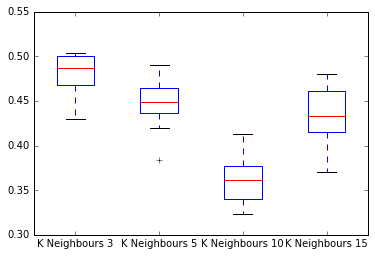

In [5]:
eval_data = [[evaluations[j][i]['Accuracy'] for j in range(len(k_range))] for i in range(10)]
eval_df = pandas.DataFrame(eval_data, columns = ["K Neighbours " + str(x) for x in k_range])
eval_df.plot.box()

In [6]:
from IPython.display import display, HTML

summary_accuracy =  eval_df.mean(axis = 0).round(4) * 100
final_df = pandas.DataFrame(list(zip(k_range, summary_accuracy)), columns=["K Neighbours", "Accuracy"])
HTML(final_df.to_html())

,K Neighbours,Accuracy
0,3,48.20
1,5,44.80
2,10,36.17
3,15,43.20


# Concluzie

Valoarea optima pentru cei mai apropiati **k vecini este 3.**

## Trebuie remarcat faptul ca kNN este o metoda care nu este fezabila.